## HealthCare Insurance Exploratory Data Analysis
**Health Insurance 2016 Marketplace**

In this blog, I tried to investigate some of the general questions regarding the heath care insurance across US states. I have tried to visualize the result as much as possible so it is easily to make inference. 
The Health Insurance Marketplace Public Use Files contain data on health and dental plans offered to individuals and small businesses through the US Health Insurance Marketplace. I picked two datafiles for EDA on dataset. I have used benefits and rate sheet to explore this domain.

The main goal of this EDA is to come of with one hypothesis which we can take ahead to do more investigation.

In [11]:
import pandas as pd
import matplotlib.pyplot as pt
from collections import defaultdict
from ggplot import *
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

The data is originally from [ Centers for Medicare & Medicaid Services (CMS) ](https://www.cms.gov/cciio/resources/data-resources/marketplace-puf.html). Since the data is quite large, I will try to read it chunk by chunk due to memory efficiency issue. Here are some of the important columns I have selected:
* "BenefitName" :Benefit Name 
* "BusinessYear: Year
* "StateCode2" : Two-character state abbreviation
* "SourceName" : Categorical identifier of source of data import
* "IsEHB" : Categorical indicator of whether benefit is considered an essential health benefit
* "IssuerId" :  numeric code that identifies the issuer organization
* "IsStateMandate" : whether benefit is required by state 

In [6]:
input_dir = "C:\\Users\\ankitswarnkar\\Projects\\SevenDaySevenData\\Healthcare\\"
header_required = ["BenefitName", "BusinessYear", "StateCode2", "SourceName", "IsEHB", "IssuerId","IsStateMandate"]
cost_data_chunks = pd.read_csv(input_dir + "health-insurance-marketplace\\BenefitsCostSharing.csv", 
                               usecols=header_required, iterator=True, chunksize=1000)

cost_data = pd.concat(chunk for chunk in cost_data_chunks)
cost_data.head()

,BenefitName,BusinessYear,IsEHB,IsStateMandate,IssuerId,SourceName,StateCode2
0,Routine Dental Services (Adult),2014,NaN,NaN,21989,HIOS,AK
1,Dental Check-Up for Children,2014,Yes,NaN,21989,HIOS,AK
2,Basic Dental Care - Child,2014,Yes,NaN,21989,HIOS,AK
3,Orthodontia - Child,2014,NaN,NaN,21989,HIOS,AK
4,Major Dental Care - Child,2014,Yes,NaN,21989,HIOS,AK


Let's start digging the data with first question of:  

** Q ."Is there any trend in Benefits offer each year?" **

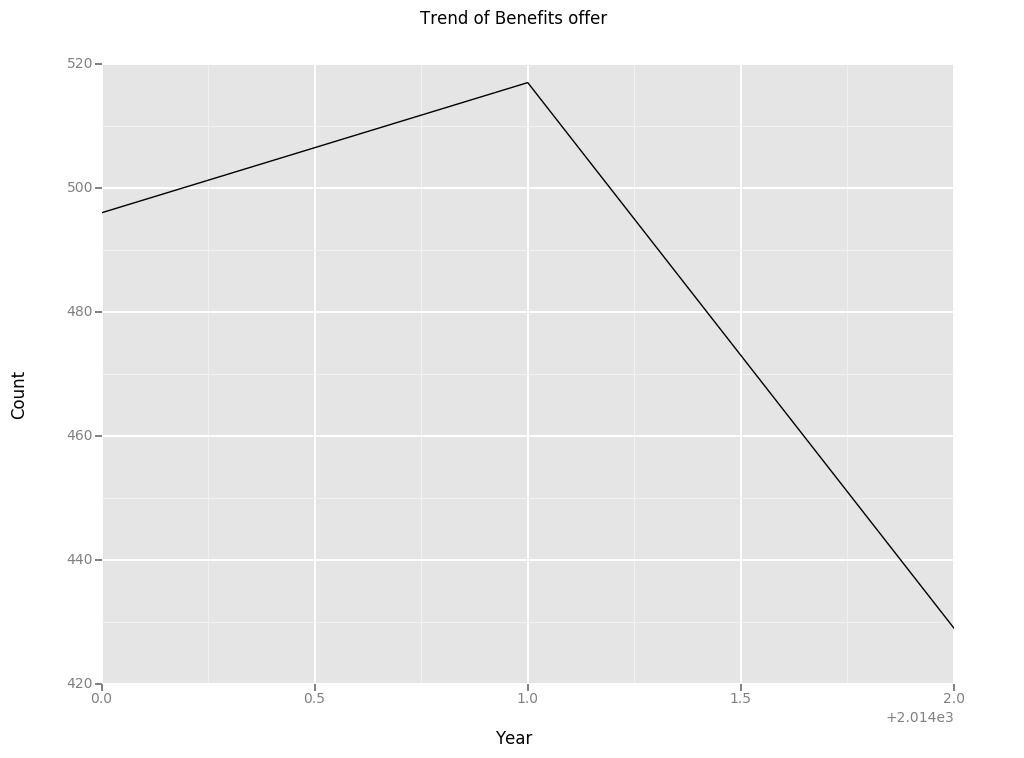

<ggplot: (136929122866)>


In [81]:
years = cost_data["BusinessYear"].unique()
benefitsName = cost_data["BenefitName"].unique()
ybenifit = dict()
for year in years: 
    year = int(year)
    mask = (cost_data['BusinessYear'] == year)
    cost_data_year = cost_data[mask]
    ybenifit[year]= len(cost_data_year["BenefitName"].unique())

ybenpd = pd.DataFrame(list(ybenifit.items()),columns=['Year','Count'])
graph =ggplot(aes(y="Count", x = 'Year'),data=ybenpd) + geom_line() + ggtitle('Trend of Benefits offer')
print(graph)

Conclusion: There was a increase in 2015 however in 2016, the number of Benefits plan were reduced. So there is not much data about other years to see particular trend.
    
Lets now try to answer 

**Q. How does states mandatory health benifits which are considered essential across states varies?**

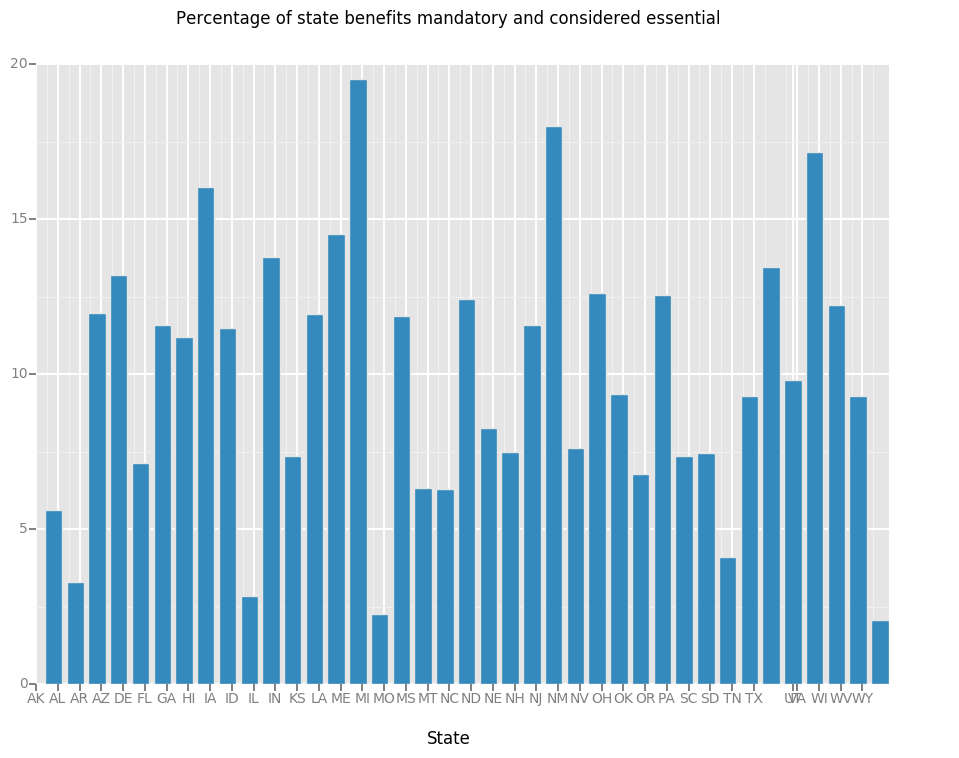

<ggplot: (-9223371899930192352)>


In [86]:
states = cost_data["StateCode2"].unique()
cost_data["IsEHB"].fillna(0, inplace=True)
cost_data["IsStateMandate"].fillna(0, inplace=True)
count_state_percent = dict()
for state in states: 
    mask =(cost_data["StateCode2"]== state) & (cost_data["IsEHB"] == "Yes") & (cost_data["IsStateMandate"] == "Yes")
    count = (len(cost_data[mask]))
    count_state_percent[state] = format((count/len(cost_data[(cost_data["StateCode2"]== state)])) * 100,'.2f')    
percent_state = pd.DataFrame(list(count_state_percent.items()),columns=['State','Percentages'])

graph1 = ggplot(aes(x="State", weight = 'Percentages'),data=percent_state) + geom_bar() + ggtitle('Percentage of state benefits mandatory and considered essential')

print(graph1)

We can see there is mix distribution among state.The maximum percentage is around 20% and around 10% on average which is quite low

Lets us move our focus on intresting rate data and try to answer some of the query. 
Let's first load the data. I am considering following headers for my EDA :
* "BusinessYear" : Year for which plan provides coverage to enrollees 
* "StateCode" : Two-character state abbreviation 
* "Age" : Categorical indicator whether age is used to determine rate eligibility
* "IndividualRate" :
* VersionNum : Integer value for version of data import
* RateEffectiveDate : Effective date of start
* FederalTIN : Tax ID Number of issuer
* Tobacco : Categorical indicator of whether a subscriber's tobacco use is used to determine rate eligibility for the insurance plan

In [13]:
input_dir = "C:\\Users\\ankitswarnkar\\Projects\\SevenDaySevenData\\Healthcare\\"
important_header = ["BusinessYear", "StateCode", "Age","IndividualRate","VersionNum","FederalTIN", "RateEffectiveDate","Tobacco"]
chunk_reader = pd.read_csv(input_dir + "health-insurance-marketplace\\Rate.csv", iterator = True, chunksize= 1000,usecols= important_header)
rate_data = pd.concat(chunk for chunk in chunk_reader)
rate_data.head()

,BusinessYear,StateCode,VersionNum,FederalTIN,RateEffectiveDate,Tobacco,Age,IndividualRate
0,2014,AK,6,93-0438772,2014-01-01,No Preference,0-20,29.00
1,2014,AK,6,93-0438772,2014-01-01,No Preference,Family Option,36.95
2,2014,AK,6,93-0438772,2014-01-01,No Preference,Family Option,36.95
3,2014,AK,6,93-0438772,2014-01-01,No Preference,21,32.00
4,2014,AK,6,93-0438772,2014-01-01,No Preference,22,32.00


The first question can be:

** Q.what is the distribution of the rates? **

Numerical summary :
count   12694445.00
mean        4098.03
std        61222.71
min            0.00
25%           29.33
50%          291.60
75%          478.98
max       999999.00
Name: IndividualRate, dtype: float64


{'boxes': [<matplotlib.lines.Line2D at 0x1f04b451a90>],
 'caps': [<matplotlib.lines.Line2D at 0x1f049c5ae80>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f0496f9be0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f0496ca860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f049c208d0>,
  <matplotlib.lines.Line2D at 0x1f049c3dbe0>]}

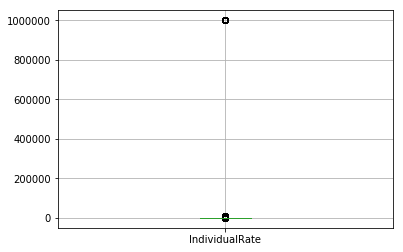

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_ind = rate_data["IndividualRate"].describe()
print("Numerical summary :")
print(data_ind)
rate_data.boxplot(column='IndividualRate')

We can see from the numeric summary and box plot that there distribution cointain outliers. Lets first cut off the outliers

In [28]:
mask = (rate_data["IndividualRate"] < 80000) 
rate_data = rate_data[mask]
rate_data.describe()

,BusinessYear,VersionNum,IndividualRate
count,12646655.00,12646655.00,12646655.00
mean,2015.04,6.86,334.65
std,0.79,3.86,521.79
min,2014.00,1.00,0.00
25%,2014.00,4.00,29.19
50%,2015.00,6.00,290.35
75%,2016.00,9.00,475.67
max,2016.00,24.00,9999.99


{'boxes': [<matplotlib.lines.Line2D at 0x268503c6588>],
 'caps': [<matplotlib.lines.Line2D at 0x26850440be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2685049a9e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26850476b70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x268503f14a8>,
  <matplotlib.lines.Line2D at 0x26850416668>]}

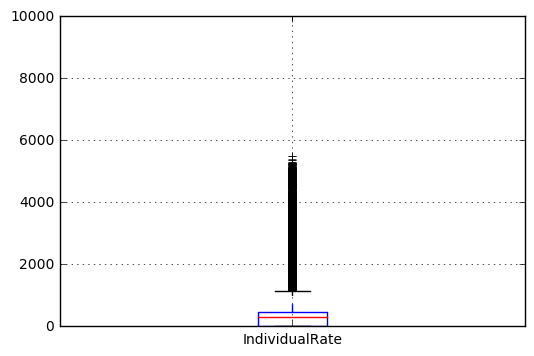

In [29]:
rate_data.boxplot(column='IndividualRate')

Let Now try to answer:

** Q.how indivisual cost vary across States? **

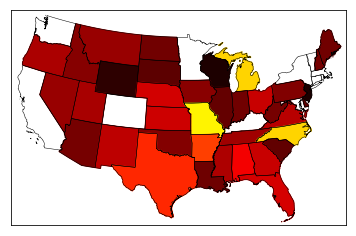

In [35]:
from statistics import median
states = rate_data["StateCode"].unique()
state_count=len(states)

#df_age_state = pd.DataFrame(abs(np.random.randn(state_count, age_count)), index=states, columns=ages)

# Create display dataframe
df_state=dict()
for state in states:
    mask =(rate_data["StateCode"]==state)
    temp_df = rate_data[mask]
    val_len=len(temp_df["IndividualRate"])
    if val_len != 0:
        df_state[state]=format(median(temp_df["IndividualRate"]),'.2f')
    else:
        df_state[state] = 0

import mpl_toolkits
import importlib
mpl_toolkits = importlib.import_module('mpl_toolkits')
import mpl_toolkits.basemap 
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
mp = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
shp_info = mp.readshapefile('st99_d00','states',drawbounds=True)
#print(shp_info)
colors={}
statenames=[]
cmap = plt.cm.hot # For Hot map plotting
vmin = 0; vmax = 450 # set range.
#print(mp.states_info[0].keys())
short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
newstatedict = dict()
colors = dict()
for statename in states:
    name_state = short_state_names[statename]
    val = df_state[statename]
    newstatedict[name_state] = val
    colors[name_state] = cmap(1.-np.sqrt((float(val)-vmin)/(vmax-vmin)))[:3] # Cmap convert 0-1 -> RGBA val

for shapedict in mp.states_info:
    statenames.append(shapedict['NAME'])

# Cycling through States and coloring them
ax = plt.gca() # current axes instance
for nshape,seg in enumerate(mp.states):
    state = statenames[nshape]

    if state in colors.keys():
        color = rgb2hex(colors[state])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.show()

The Plot shows the heat map of the various rates across the states. White region means the data are not available with us. We can see most of the western states are having higher rates as compared to western state. WY and WI seem to have the highest indivisual rates.

**Conclusion: **

From the basic analysis, one of the study which we can take ahead is "whether US states rate really have impact on the indivisual rates". We can use covariates like Human development index, per capita index of the states, cost of living, cost of heathcare, number of casualities and others and finally using some of the causal tool like propensity score matching and difference in difference we can validate whether the US states is really impacting the rates or its just a sample variation.   

References for Data :
* Centers for Medicare & Medicaid Services. (2015). 2016 Health Insurance Marketplace Public Use Files
(Specific data file name – e.g., Plan Attributes PUF) [Data file and code book]. Retrieved from
 http://www.cms.gov/CCIIO/Resources/Data-Resources/marketplace-puf.html
* Centers for Medicare & Medicaid Services. (2014). 2015 Health Insurance Marketplace Public Use Files
(Specific data file name – e.g., Plan Attributes PUF) [Data file and code book]. Retrieved from
http://www.cms.gov/CCIIO/Resources/Data-Resources/marketplace-puf.html
* Centers for Medicare & Medicaid Services. (2014). 2014 Health Insurance Marketplace Public Use Files
(Specific data file name – e.g., Plan Attributes PUF) [Data file and code book]. Retrieved from
http://www.cms.gov/CCIIO/Resources/Data-Resources/marketplace-puf.html
* Kaggle Health Insurance Marketplace. (2015). Explore health and dental plans data in the [US Health Insurance Marketplace](https://www.kaggle.com/hhs/health-insurance-marketplace)